In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 100
Nx = 100
Ny = 100

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = 0.2#x[1] - x[0]
deltay = 0.2#y[1] - y[0]
deltat = 0.01#t[1] - t[0]

k = 1#0.0075

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)

0.24999999999999994 0.24999999999999994


Fue modificado el valor de dt para que no fuese inestable

In [3]:
def Ti(x,y,t):
    return np.sin(np.pi*(x+y))

In [4]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y,t)
    T[:,0,:] = np.exp(-2*t*np.pi**(2))*np.sin(np.pi*(y))
    T[:,-1,:] = np.exp(-2*t*np.pi**(2))*np.sin(np.pi*(x))
    T[:,:,0] = np.exp(-2*t*np.pi**(2))*np.sin(np.pi*(1+y))
    T[:,:,-1] = np.exp(-2*t*np.pi**(2))*np.sin(np.pi*(1+x))
    
    return T

In [5]:
T = InitT()
#print(T[0,:,:])
#print(T[:,0,:])

[[1.22464680e-16 2.59925908e-02 4.25665689e-02 ... 2.52818035e-10
  1.03610685e-10 1.22464680e-16]
 [1.22464680e-16 2.59925908e-02 4.25665689e-02 ... 2.52818035e-10
  1.03610685e-10 1.22464680e-16]
 [1.22464680e-16 2.59925908e-02 4.25665689e-02 ... 2.52818035e-10
  1.03610685e-10 1.22464680e-16]
 ...
 [1.22464680e-16 2.59925908e-02 4.25665689e-02 ... 2.52818035e-10
  1.03610685e-10 1.22464680e-16]
 [1.22464680e-16 2.59925908e-02 4.25665689e-02 ... 2.52818035e-10
  1.03610685e-10 1.22464680e-16]
 [1.22464680e-16 2.59925908e-02 4.25665689e-02 ... 2.52818035e-10
  1.03610685e-10 1.22464680e-16]]


In [6]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        #T[l,0,:] = np.sin(20*t[l])
        
        for i in range(1,len(x)-2):
            
            for j in range(1,len(y)-2):
                #T[l,0,j] = np.exp(-2*t[l]*np.pi**(2))*np.sin(np.pi*(y[j]))
                #T[l,-1,j] = np.exp(-2*t[l]*np.pi**(2))*np.sin(np.pi*(x[i]))
                #T[l,i,0] = np.exp(-2*t[l]*np.pi**(2))*np.sin(np.pi*(1+y[j]))
                #T[l,i,-1] = np.exp(-2*t[l]*np.pi**(2))*np.sin(np.pi*(1+x[i]))
                
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])

In [7]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 87.75it/s]


<IPython.core.display.Javascript object>


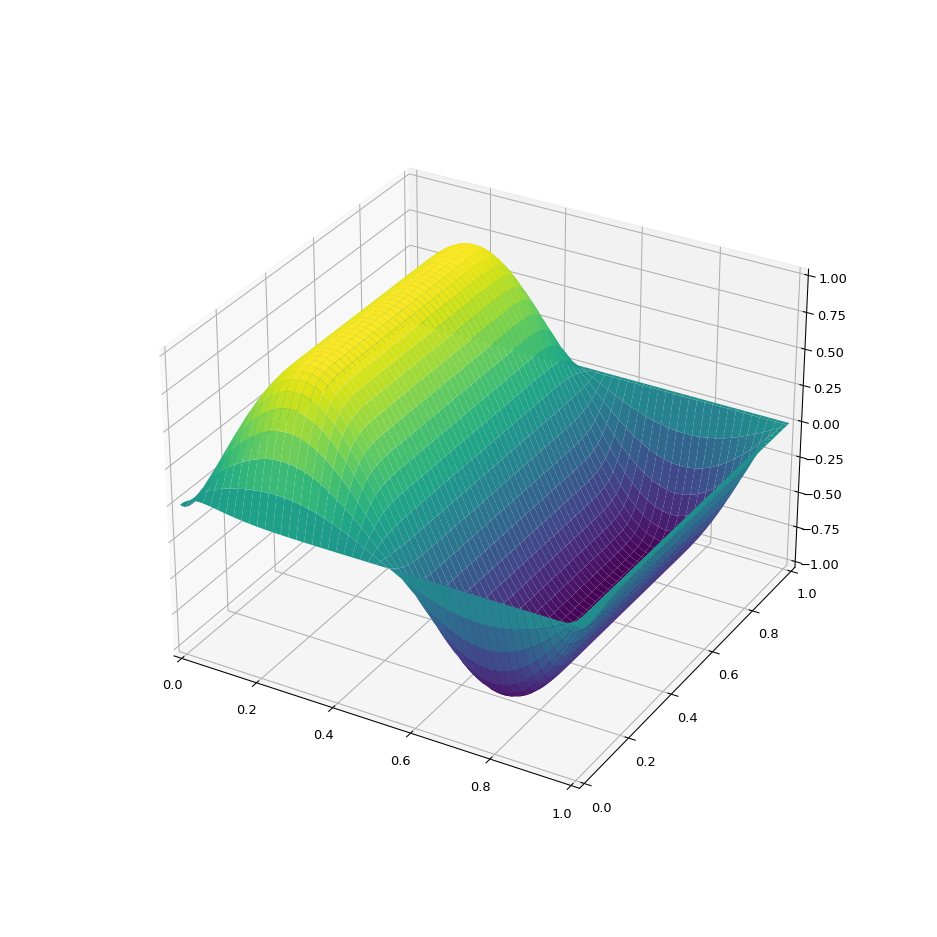

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(-1,1)
1
def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)